<h1> Week 9 Homework -  Part 2

<h2>Question 13.2</h2>

In this problem you, can simulate a simplified airport security system at a busy airport. Passengers arrive according to a Poisson distribution with λ1 = 5 per minute (i.e., mean interarrival rate λ1 = 0.2 minutes) to the ID/boarding-pass check queue, where there are several servers who each have exponential service time with mean rate λ2 = 0.75 minutes. [Hint: model them as one block that has more than one resource.] <br>
After that, the passengers are assigned to the shortest of the several personal-check queues, where they go through the personal scanner (time is uniformly distributed between 0.5 minutes and 1 minute). <br>
<br>
Use the Arena software (PC users) or Python with SimPy (PC or Mac users) to build a simulation of the system, and then vary the number of ID/boarding-pass checkers and personal-check queues to determine how many are needed to keep average wait times below 15 minutes. [If you’re using SimPy, or if you have access to a non-student version of Arena, you can use λ1 = 50 to simulate a busier airport.] 

In [1]:
# import SimPy Package
import simpy
# import random package for distributions
import random
import numpy as np
# Package for plotting
%matplotlib inline
import matplotlib.pyplot as plt

<p><p style="page-break-after:always;"></p></p>

Create Airport Class

In [2]:
random.seed(10)
class Airport(object):
    def __init__(self, env, num_servers, num_scanners):
        # assign environment as SimPy environment
        self.env = env
        
        # Create the Servers resource
        # Modelling servers as one block that has more than one resource
        self.servers = simpy.Resource(env, num_servers)
        
        # Create the Scanners resources
        # Note a list of Multiple blocks
        self.scanners = []
        for i in range(num_scanners):
            block = simpy.Resource(env, capacity = 1)
            self.scanners.append(block)
    
    # define the process of passing a server
    def pass_server(self, passenger):
        # estimate and return an iterable of the time needed to pass the servers
        yield self.env.timeout(np.random.exponential(servers_inv_rate))  # Exponential distribution
        
    # define the process of passing a server
    def pass_scanner(self, passenger):
        # estimate and return an iterable of the time needed to pass the scanners
        yield self.env.timeout(random.uniform(scan_min_time, scan_max_time))  # Uniform distribution 

<p><p style="page-break-after:always;"></p></p>

Define go to Airport Function

In [3]:
def go_to_airport(env, passenger, airport):
    # Moviegoer arrives at the theater
    arrival_time = env.now
    
    # Simulate passing a server
    with airport.servers.request() as request:
        # wait for a server to become available if all are currently in use
        start_server_wait =  env.now
        yield request
        end_server_wait =  env.now
        # Pass the server
        yield env.process(airport.pass_server(passenger))
        exit_server_time = env.now
        servers_wait_time.append(end_server_wait-start_server_wait)
    
    # Simulate passing a Scanner
    # Finding shortest Queue Scanner
    min_q_scanner = 0
    for a_scanner in range(0, num_scanners):
        if len(airport.scanners[a_scanner].queue) < len(airport.scanners[min_q_scanner].queue):
            min_q_scanner = a_scanner
    
    # Simulate passing the lowest queue scanner
    with airport.scanners[min_q_scanner].request() as request:
        # wait for a scanner to become available if all are currently in use
        start_scanner_wait =  env.now
        yield request
        end_scanner_wait =  env.now
        # Pass the scanner
        yield env.process(airport.pass_scanner(passenger))
        # Store scanner wait time
        exit_scan_time = env.now
        scanners_wait_time.append(end_scanner_wait-start_scanner_wait)
    
    # Passenger Passes all check points
    total_wait_times.append(env.now - arrival_time)

Define Run Simulation

In [4]:
random.seed(10)
def run_simulation(env, num_servers, num_scanners, arrival_rate):
    # Define Airport
    airport = Airport(env, num_servers, num_scanners)
    
    # initialize passenger
    global passenger
    passenger = 0
    
    while True:
        # Generate New passengers based on Poisson distribution
        new_passenger_arrival = np.random.poisson(arrival_rate)
        while new_passenger_arrival == 0:
            new_passenger_arrival = np.random.poisson(arrival_rate)
        yield env.timeout(1/new_passenger_arrival)
        passenger += 1
        env.process(go_to_airport(env, passenger, airport))

<p><p style="page-break-after:always;"></p></p>

Define Inputs and run Base Case Simulation

In [5]:
# define input data
arrival_rate = 5  # passengers per minute
servers_inv_rate = 0.75  # minute per passenger
scan_min_time = 0.5  # minute per passenger
scan_max_time = 1.0  # minute per passenger

# Assumptions
num_servers = 4
num_scanners = 4

In [6]:
# empty lists to store results
total_wait_times = []
servers_wait_time = []
scanners_wait_time = []

# Set up the environment
env = simpy.Environment()
env.process(run_simulation(env, num_servers, num_scanners, arrival_rate))

# Run simulation for simulating 60 minutes for 24 hours (1 Day)
sim_duration = 60*24
env.run(until=sim_duration)

# calculate Mean results
avg_system_time = round(sum(total_wait_times)/len(total_wait_times), 3)
avg_servers_wait_time = round(sum(servers_wait_time)/len(servers_wait_time), 3)
avg_scanners_wait_time = round(sum(scanners_wait_time)/len(scanners_wait_time), 3)
total_avg_wait_time = round(avg_servers_wait_time + avg_scanners_wait_time, 3)

# get results
print("Number of Passengers", passenger, "Mean", round(passenger/sim_duration), "Passengers/Minute")
print("Average Total System time:", avg_system_time, "mins")
print("Average Wait time for the Servers:", avg_servers_wait_time, "mins")
print("Average Wait time for the Scanners:", avg_scanners_wait_time, "mins")
print("Total Average Wait time:", total_avg_wait_time, "mins")

Number of Passengers 5573 Mean 4 Passengers/Minute
Average Total System time: 2.194 mins
Average Wait time for the Servers: 0.224 mins
Average Wait time for the Scanners: 0.463 mins
Total Average Wait time: 0.687 mins


The results shown above are after a sensivity analysis process for a 1 day simulation model. The results are:
1. Optimum number of ID/boarding-pass check servers is between 3 and 4 (4 was used to avoid Max wait time exceeding 15 mins as well as different impacts of random seeds).
2. Optimum number of personal scanners is 3 and 4 (4 was used to avoid Max wait time exceeding 15 mins as well as different impacts of random seeds).

This reduces the average wait time to around 0.7 minutes with peak waiting times in both servers and scanners queues being around 1 minute to 3 minutes as shown in the plots below

<p><p style="page-break-after:always;"></p></p>

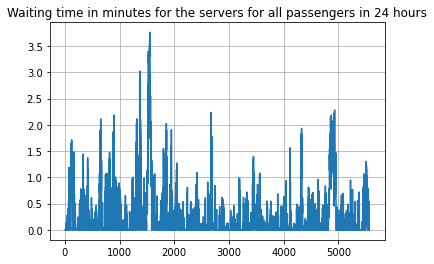

In [7]:
plt.plot(servers_wait_time)
plt.title("Waiting time in minutes for the servers for all passengers in 24 hours")
plt.grid()
plt.show()

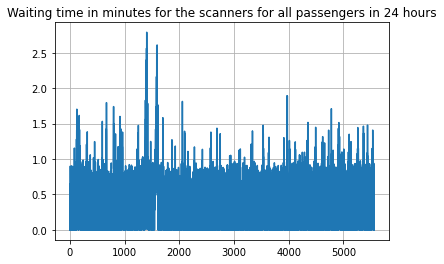

In [8]:
plt.plot(scanners_wait_time)
plt.title("Waiting time in minutes for the scanners for all passengers in 24 hours")
plt.grid()
plt.show()

<p><p style="page-break-after:always;"></p></p>

<b> Repeating the process for an airport with an arrival rate of 50 passengers per minute. </b>

In [9]:
# define input data
arrival_rate = 50  # passengers per minute
servers_inv_rate = 0.75  # minute per passenger
scan_min_time = 0.5  # minute per passenger
scan_max_time = 1.0  # minute per passenger

# Assumptions
num_servers = 37
num_scanners = 37

In [10]:
# empty lists to store results
total_wait_times = []
servers_wait_time = []
scanners_wait_time = []

# Set up the environment
env = simpy.Environment()
env.process(run_simulation(env, num_servers, num_scanners, arrival_rate))

# Run simulation for simulating 60 minutes for 24 hours (1 Day)
sim_duration = 60*24
env.run(until=sim_duration)

# calculate Mean results
avg_system_time = round(sum(total_wait_times)/len(total_wait_times), 3)
avg_servers_wait_time = round(sum(servers_wait_time)/len(servers_wait_time), 3)
avg_scanners_wait_time = round(sum(scanners_wait_time)/len(scanners_wait_time), 3)
total_avg_wait_time = round(avg_servers_wait_time + avg_scanners_wait_time, 3)

# get results
print("Number of Passengers", passenger, "Mean", round(passenger/sim_duration), "Passengers/Minute")
print("Average Total System time:", avg_system_time, "mins")
print("Average Wait time for the Servers:", avg_servers_wait_time, "mins")
print("Average Wait time for the Scanners:", avg_scanners_wait_time, "mins")
print("Total Average Wait time:", total_avg_wait_time, "mins")

Number of Passengers 70550 Mean 49 Passengers/Minute
Average Total System time: 4.528 mins
Average Wait time for the Servers: 1.68 mins
Average Wait time for the Scanners: 1.346 mins
Total Average Wait time: 3.026 mins


<p><p style="page-break-after:always;"></p></p>

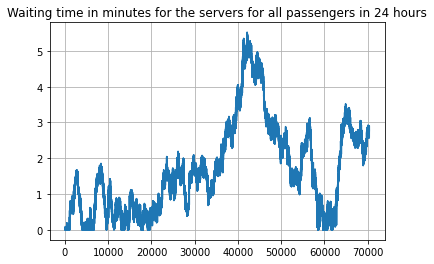

In [11]:
plt.plot(servers_wait_time)
plt.title("Waiting time in minutes for the servers for all passengers in 24 hours")
plt.grid()
plt.show()

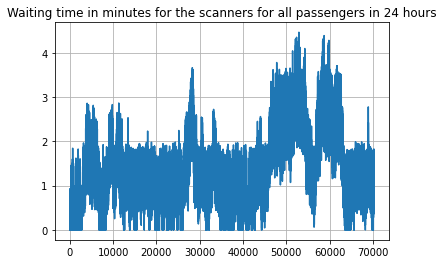

In [12]:
plt.plot(scanners_wait_time)
plt.title("Waiting time in minutes for the scanners for all passengers in 24 hours")
plt.grid()
plt.show()

The results shown above are after a sensivity analysis process for a 1 day simulation model. The results are:
1. Optimum number of ID/boarding-pass check servers is 37
2. Optimum number of personal scanners is 37

conclusion, simulating a busier airport (Passengers arrive according to a Poisson distribution with λ1 = 50 per minute) 10X the first airport arrival's rate, lead to increasing the number of servers & Scanners needed by 10 times.

<p><p style="page-break-after:always;"></p></p>

<b> Some Notes on the results: </b>
1. Reducing the Number of Scanners or Servers to 30 results in a continous increase in waiting time with increasing number of passengers due to overflow compared to system capacity.
2. Working on small time frames e.g. 1 hour would lead to misleading results as the average might still be less than 15 minutes however there would be a continous increase in the system that was not captured. (Note at 1 hour +/- 2500 passenger should pass on the graph below)

In [13]:
# Assumptions
num_servers = 30
num_scanners = 37

# empty lists to store results
total_wait_times = []
servers_wait_time = []
scanners_wait_time = []

# Set up the environment
env = simpy.Environment()
env.process(run_simulation(env, num_servers, num_scanners, arrival_rate))

# Run simulation for simulating 60 minutes for 12 hours
sim_duration = 60*12
env.run(until=sim_duration)

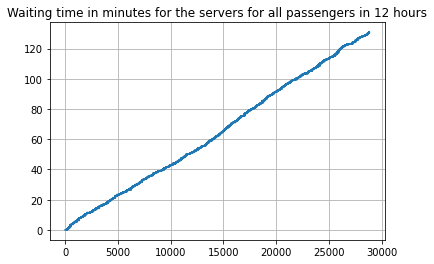

In [14]:
plt.plot(servers_wait_time)
plt.title("Waiting time in minutes for the servers for all passengers in 12 hours")
plt.grid()
plt.show()

<p><p style="page-break-after:always;"></p></p>

Sensitivity Analysis on the number of Servers

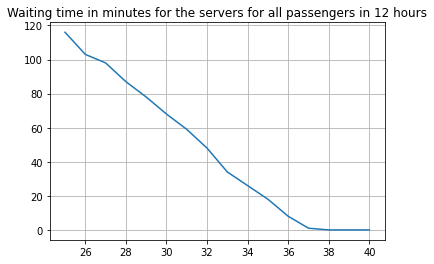

In [15]:
# initialize Assumptions
num_servers = 50
num_scanners = 50

# Vector to store results
avg_servers_wait_time_list = np.repeat(0,16,axis=0)

# Loop with different number of Servers
for i in range(25, 40):
    num_servers = i
    # empty lists to store results
    total_wait_times = []
    servers_wait_time = []
    scanners_wait_time = []

    # Set up the environment
    env = simpy.Environment()
    env.process(run_simulation(env, num_servers, num_scanners, arrival_rate))

    # Run simulation for simulating 60 minutes for 12 hours
    sim_duration = 60*12
    env.run(until=sim_duration)
    
    # Store Results
    avg_servers_wait_time_list[i-25] = round(sum(servers_wait_time)/len(servers_wait_time), 3)

# plot results
plt.plot(list(range(25,41)), avg_servers_wait_time_list)
plt.title("Waiting time in minutes for the servers for all passengers in 12 hours")
plt.grid()
plt.show()

<p><p style="page-break-after:always;"></p></p>

Sensitivity Analysis on the number of Scanners

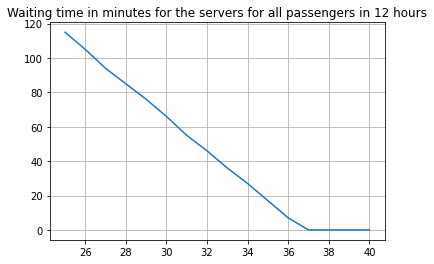

In [16]:
# initialize Assumptions
num_servers = 100
num_scanners = 100

# Vector to store results
avg_scanners_wait_time_list = np.repeat(0,16,axis=0)

# Loop with different number of Scanners
for i in range(25,40):
    num_scanners = i
    # empty lists to store results
    total_wait_times = []
    servers_wait_time = []
    scanners_wait_time = []

    # Set up the environment
    env = simpy.Environment()
    env.process(run_simulation(env, num_servers, num_scanners, arrival_rate))

    # Run simulation for simulating 60 minutes for 12 hours
    sim_duration = 60*12
    env.run(until=sim_duration)
    
    # Store Results
    avg_scanners_wait_time_list[i-25] = round(sum(scanners_wait_time)/len(scanners_wait_time), 3)

# plot results
plt.plot(list(range(25,41)), avg_scanners_wait_time_list)
plt.title("Waiting time in minutes for the servers for all passengers in 12 hours")
plt.grid()
plt.show()